# Tonal Representation in Jane Austen's Pride and Prejudice

## Research Question:
To what extent are positive, neutral, or negative adjectives mentioned in *Pride and Prejudice*, and what does this signal about tone?

![title](https://www.gutenberg.org/cache/epub/1342/pg1342.cover.medium.jpg)

## Background
*Pride and Prejudice* is Jane Austen’s second novel. It follows the character of Elizabeth Bennett, the second eldest daughter of the Bennett family. The Bennett family consists of Mr. and Mrs. Bennett and their five daughters; as their property can only pass to a male heir, the novel focuses on the family’s pressing need for at least one of their daughters to marry and marry well. 

In addition to the focus on Elizabeth Bennett, the novel centers on her love interest, Mr. Fitzwilliam Darcy, an intelligent, handsome, and very wealthy man. As a source of dramatic tension, the urgent need for a Bennett daughter to marry clashes with the fact that Darcy’s traits of pridefulness and arrogance dissuade Elizabeth, who is prejudiced against him from the start, from any thoughts of marriage. However, Darcy’s pride and bad manners provide Elizabeth the opportunity to “transform apparent hostility into lasting commitment and a happy-ever-after marriage.” This happy ending provides, upon first glance, an indication that the tone of the novel would sway toward the positive.

This project intends to focus on the tone of *Pride and Prejudice*, or the expression of the author's attitude, and consider whether the expectation that the tone throughout the novel will sway towards the positive, reflecting the 'happy-ever-after,' is an accurate assumption. This project will explore this tonal representation through textual analysis by sorting the novel into its parts of speech and subsequently analyzing the adjectives peppered throughout the story. The clearly defined research question stated above will provide a roadmap for what the project must accomplish in order to provide an answer to this question.

By analyzing the frequency of adjectives with positive, neutral, or negative connotations, a data-based visualization of the emotive direction in which the tone trends will emerge. This will provide insight into Austen’s use of language, as the descriptive nature of adjectives and their place as language modifiers means their impact on the story creates a particular tone. Essentially, by clearly sorting and visualizing these adjectives, the project will be able to focus on literal language usage, specifically adjectives, to analyze whether or not the ‘happy-ever-after marriage’ within *Pride and Prejudice* has tonal precedent.

## Process

### Normalization
1. Begin by importing any necessary requirements.
2. Turn Project Gutenburg's Pride and Prejudice into a .utf-8 file.
3. Import the file into the notebook.
4. Remove the punctuation.
5. Make the text lowercase.
6. Tokenize the text.
7. Remove stopwords from the text.
8. Remove numbers (e.g., years) from the text.

### Text Sortation: Part 1
1. Part of speech (POS) tagging.
2. Sort out the adjectives.
3. Remove non-adjectives from the adjective-tagged list.
4. Count word frequency.
5. Sort out adjectives appearing at least 10 times.

### Visualization: Part 1
1. Barplot of the top adjectives.

### Text Sortation: Part 2
1. Sort adjectives into the categories of 'Positive,' 'Neutral,' or 'Negative.'

### Visualization: Part 2
1. Barplot of the top adjectives and their Correlations to 'Positive,' 'Neutral,' or 'Negative.'
2. Barplot of the frequencies of the top adjectives and their Correlations to 'Positive,' 'Neutral,' or 'Negative.'

### Analysis and Conclusion

## Let's Start the Process!
Let's begin by importing necessary requirements.

In [1]:
!pip install pandas
import pandas as pd 

!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

!pip install spacy

import os
import re
import spacy
import string
import math
import random
import numpy as np
from collections import Counter

## Converting and Uploading Pride and Predjudice from Project Gutenburg
I used the application Sublime Text to convert Project Gutenberg's *Pride and Prejudice* text into utf-8-sig format and deleted the Project Gutenberg introduction and legal statements prior to importing.

To run this yourself, download the text from [here](https://www.gutenberg.org/ebooks/1342) and run the same process, changing the code below with the location of your downloaded and altered text file. You can also download the text file from the repository: whichever you prefer!

In [2]:
text = open('/Users/seali/Downloads/pnp-text.txt', encoding = 'utf-8-sig').read()

# Print to check the step worked!
# print(text)

## Removal of the Punctuation
Next, import the punctuation, and print to check that it contains all characters I want to exclude. Then, run code to remove the punctuation.

In [3]:
from string import punctuation 
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
for char in punctuation:
    text = text.replace(char, "")
    
# Print to check the step worked!
# print(text)

## Making all of the Text Lowercase
Next, run code to turn our working text into lowercase.

In [5]:
text_lower = text.lower()

# Print to check the step worked!
# print(text_lower)

## Tokenization of the Text
Next, import all needed code for this process. Run code to tokenizer the text!

In [6]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize #can potentially delete
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
tokens = word_tokenize(text_lower)

# Print to check the step worked!
# print(tokens)

#### Just for fun, how many words are we working with?

In [8]:
print(len(tokens))

121931


#### Wow!

## Removal of Stopwords
Next, import all the code needed for this process. Then, run the code to remove all stop words from the text!

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Check the list of stopwords to ensure it includes everything we want to exclude from the text.
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
text_nostop = [word for word in tokens if word not in stopwords.words('english')]

# Print to check the step worked!
# print(text_nostop)

#### How many words are we working with now?

In [12]:
print(len(text_nostop))

55170


## Removal of  Numbers from the Text
Run code to remove all numbers (e.g., years) from the text, as they are unnecessary and irrelevant to the analysis!

In [13]:
text_nostop_nonum = [item for item in text_nostop if not item.isdigit()]

# Print to check the step worked!
# print(text_nostop_nonum)

## Part of Speech Text Processing
Remember to use the fully processed text—tokenized, without stopwords or numbers.

In [14]:
from nltk import pos_tag

In [15]:
pos_tag_tokens = pos_tag(text_nostop_nonum)

# Run to check the step worked!
# pos_tag_tokens

**Scrolling though the text, the adjectives seem just as useful and interesting as anticipated! Now, let's move onto sorting out the adjectives from the text and making visualizations for them.**

In [16]:
adjectives = []
for item in pos_tag_tokens:
    if item[1] == 'JJ':
        adjectives.append(item[0])
        
# Print to check the step worked!
# print(adjectives)

**Now, manually remove any remaing words that are *not* adjectives. To keep a standard, I used the Merriam Webster definition of each word; if the word could, in any instance, be used as an adjective, it remained in the processed text.**

In [17]:
item_to_remove = {'head','write','listen','publish','consent','listen','expected','answered','dare','fullpursuing','maiden','fault','sunday','respectable','fearnot','parish','favour','followed','warwick','obtained','mr','miss','mrs','elizabeth','lady','wish','darcy','give','lizzy','netherfield','mary','know','sir','oh','pleased','lydia','hear','speak','london','cried','sister','table','wickam','kitty','uncle','lydias','till','bingley','replied','library','elizabeths','longbourn','spite','happiness','arrival','catherine','astonishment','fortune','jane','behaviour','come','suppose','honour','engagement','saturday','darcys','smile','receive','ten','want','fortnight','regret','neighbourhood','sight','gentleman','thought','leave','appear','length','understood','saw','understand','understanding','sat','walked','make','pemberley','meant','see','motive','degree','avoid','pray','servant','follow','collinss','ladyship','bear','fitzwilliam','neglect','accept','fear','hurst','chose','knew','told','delight','tuesday','dine','denny','conceal','monday','door','amongst','girl','convinced','notice','william','purpose','attempt','ask','aloud','enjoyment','stairs','endeavour','invite','sixteen','wickhams','learnt','bring','marry','father','stay','forgive','regiment','wished','egerton','military','la','disposed','advantage','nature','believe','charlotte','laugh','friend','compliment','ladys','nay','uncles','thanked','rid','aunt','felt','console','imagine','interrupt','nephew','entered','affair','affected','call','caroline','kent','c','window','colonel','wanted','wickham'}

In [18]:
non_adject_removed = [item for item in adjectives if item not in item_to_remove]

# Print to check the step worked!
# print(non_adject_removed)

## Counting Word Frequencies
Use Python's built in 'Counter' function to count the frequencies of individual words in the text. Don't use 'print()' as it's easier to view by just running the code. The words will be listed in the descending order of most common to least common.

In [19]:
from collections import Counter
processed_adject_freq = Counter(non_adject_removed)

# Run to check the step worked!
# processed_adject_freq

**Now, sort out the adjectives that appear within *Pride and Predjudice* at *least* ten times. This frequency is large anough that these adjectives can be assumed to be reflective of the tone of the novel. I ran different code variations, noted below, and settled on the 129th most common adjectives.**

In [20]:
# The code below will not show all adjectives that appear ten times.
    # non_adject_removed_freq.most_common(128)

# The code below will begin to show adjectives that appear nine times.
    # non_adject_removed_freq.most_common(130)

# So, use the 129th most common adjectives to analyze the adjectives that appear at least ten times.
processed_adject_freq.most_common(129)

[('much', 218),
 ('good', 187),
 ('little', 173),
 ('great', 142),
 ('young', 128),
 ('last', 119),
 ('many', 118),
 ('dear', 106),
 ('first', 87),
 ('happy', 78),
 ('sure', 74),
 ('whole', 74),
 ('subject', 66),
 ('present', 62),
 ('next', 57),
 ('possible', 56),
 ('able', 54),
 ('certain', 53),
 ('general', 48),
 ('enough', 43),
 ('impossible', 41),
 ('short', 41),
 ('long', 40),
 ('agreeable', 40),
 ('poor', 37),
 ('former', 37),
 ('different', 35),
 ('amiable', 34),
 ('usual', 34),
 ('necessary', 31),
 ('real', 31),
 ('sensible', 30),
 ('equal', 30),
 ('right', 29),
 ('afraid', 28),
 ('object', 28),
 ('particular', 27),
 ('fine', 26),
 ('likely', 26),
 ('handsome', 26),
 ('true', 26),
 ('new', 25),
 ('anxious', 25),
 ('serious', 24),
 ('large', 23),
 ('second', 23),
 ('ill', 23),
 ('several', 23),
 ('small', 23),
 ('natural', 22),
 ('early', 22),
 ('easy', 20),
 ('glad', 20),
 ('fair', 20),
 ('common', 19),
 ('surprised', 19),
 ('ready', 19),
 ('strong', 19),
 ('proper', 19),
 ('hi

In [21]:
top_129_adject = processed_adject_freq.most_common(129)

## Move on to Visualizations!

## Graph 1: Bar Plot of the Top 129 Adjectives
This step is not particularity useful for tonal analysis, however, it will be an interesting way to visualize the frequencies of the top 129 adjectives as they appear in the text. 

**I've chosen a light blue color for the graphs that do not prove to be the most useful for the goal of tonal analysis.**

In [22]:
mpl.rc('savefig', dpi=200)
plt.style.use('classic')
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

In [23]:
%matplotlib inline

In [24]:
top_129_adject_DF = pd.DataFrame(processed_adject_freq.most_common(129), columns = ['Adjectives' , 'Frequency'])
top_129_adject_DF

,Adjectives,Frequency
0,much,218
1,good,187
2,little,173
3,great,142
4,young,128
...,...,...
124,generous,10
125,eager,10
126,disappointed,10
127,related,10


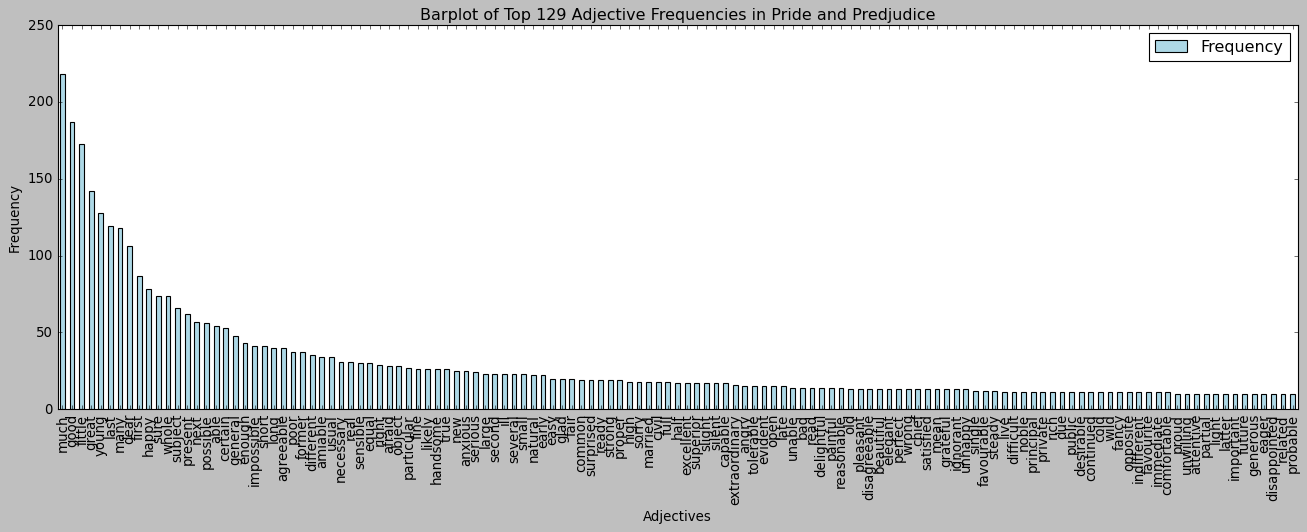

In [25]:
barplot = top_129_adject_DF.plot.bar(x='Adjectives', y='Frequency', 
                                     rot=90, 
                                     title = 'Barplot of Top 129 Adjective Frequencies in Pride and Predjudice', 
                                     figsize = (20,6), 
                                     color = '#ADD8E6');
plt.xlabel('Adjectives');
plt.ylabel('Frequency');

**Just as I suspected! This graph is not particularly helpful for tonal analysis (which is, of course, the main focus of this project!), but it is a fun way to visualize the frequency of each adjective!**

**Now, let's move on to the more helpful graphs.**

## Denote the Most Common Adjectives as 'Positive,' 'Neutral,' or 'Negative'
To begin the process of creating more helpful visualizations, classify the chosen adjectives as having a positive, neutral, or negative connotation. Doing this manually (for the top 129 adjectives) was the most effective way, as I was able to account for the language conventions of Austen's time. To maintain standardization, I used the Merriam-Webster definition of each word; if the adjective is generally used to modify nouns positively, it was labeled as positive just as adjectives that are typically used to modify nouns negatively were labeled as negative.

If a word could be used as a negative *or* positive modifying word, it got the label neutral. If the word related to sizes, ages, number orders, or was generally not placeable in the positive or negative category, it also got the label neutral.

In [26]:
# This dictionary only denotes the connotations of the top 129 adjectives.
dictionary = {'much':'neutral','good':'positive','little':'neutral','great':'positive','young':'neutral','last':'neutral','many':'neutral','dear':'positive','first':'neutral','happy':'positive','sure':'positive','whole':'neutral','subject':'neutral','present':'neutral','next':'neutral','possible':'positive','able':'positive','certain':'positive','general':'neutral','enough':'positive','impossible':'negative','young':'neutral','short':'neutral','long':'neutral','young':'neutral','agreeable':'positive','poor':'negative','former':'neutral','different':'neutral','amiable':'neutral','usual':'neutral','necessary':'positive','real':'positive','sensible':'positive','equal':'positive','right':'positive','afraid':'negative','object':'neutral','particular':'neutral','fine':'neutral','likely':'positive','handsome':'positive','true':'positive','new':'positive','anxious':'negative','serious':'neutral','large':'neutral','second':'neutral','ill':'negative','several':'neutral','small':'neutral','natural':'neutral','early':'neutral','easy':'positive','glad':'positive','fair':'positive','common':'neutral','surprised':'neutral','ready':'positive','strong':'positive','proper':'neutral','high':'neutral','sorry':'negative','married':'positive','civil':'positive','full':'positive','half':'neutral','excellent':'positive','superior':'positive','slight':'negative','silent':'neutral','capable':'positive','extraordinary':'positive','angry':'negative','tolerable':'negative','evident':'neutral','open':'neutral','late':'negative','unable':'negative','bad':'negative','read':'neutral','delightful':'positive','painful':'negative','reasonable':'positive','old':'neutral','pleasant':'positive','disagreeable':'negative','beautiful':'positive','elegant':'positive','perfect':'positive','wrong':'negative','chief':'neutral','satisfied':'positive','mean':'negative','grateful':'positive','ignorant':'negative','unhappy':'negative','single':'neutral','favourable':'positive','steady':'positive','live':'neutral','difficult':'neutral','noble':'positive','principal':'neutral','private':'neutral','rich':'positive','due':'neutral','public':'neutral','desirable':'positive','continued':'neutral','cold':'neutral','wild':'negative','fancy':'positive','opposite':'neutral','indifferent':'negative','favourite':'positive','immediate':'positive','comfortable':'positive','proud':'neutral','unwilling':'negative','attentive':'positive','partial':'negative','light':'neutral','latter':'neutral','important':'positive','future':'neutral','generous':'positive','eager':'positive','disappointed':'neutral','related':'neutral','probable':'positive'}

In [27]:
# Print to check the step worked!
# Printing also ensures that all of the adjectives are labeled correctly!
dictionary

{'much': 'neutral',
 'good': 'positive',
 'little': 'neutral',
 'great': 'positive',
 'young': 'neutral',
 'last': 'neutral',
 'many': 'neutral',
 'dear': 'positive',
 'first': 'neutral',
 'happy': 'positive',
 'sure': 'positive',
 'whole': 'neutral',
 'subject': 'neutral',
 'present': 'neutral',
 'next': 'neutral',
 'possible': 'positive',
 'able': 'positive',
 'certain': 'positive',
 'general': 'neutral',
 'enough': 'positive',
 'impossible': 'negative',
 'short': 'neutral',
 'long': 'neutral',
 'agreeable': 'positive',
 'poor': 'negative',
 'former': 'neutral',
 'different': 'neutral',
 'amiable': 'neutral',
 'usual': 'neutral',
 'necessary': 'positive',
 'real': 'positive',
 'sensible': 'positive',
 'equal': 'positive',
 'right': 'positive',
 'afraid': 'negative',
 'object': 'neutral',
 'particular': 'neutral',
 'fine': 'neutral',
 'likely': 'positive',
 'handsome': 'positive',
 'true': 'positive',
 'new': 'positive',
 'anxious': 'negative',
 'serious': 'neutral',
 'large': 'neutra

## Run More Visualizations!

## Graph 2: Bar Plot of the Top 129 Adjectives and their Correlations to Positive, Neutral, or Negative
Now that the adjectives have been labeled positive, neutral, or negative, we can move on to creating more helpful visualizations.

This graph displays the top 129 adjectives through their positive, neutral, or negative connotations, not considering their frequencies.

This graph is far more helpful than Graph 1 but less helpful than the upcoming Graph 3. While Graph 1 simply visualized the number of times the top 129 adjectives appeared, Graph 2 begins to consider each adjective's associated connotations. However, Graph 2 does not take into account the fact that each term occurs in the text a unique number of times, which has implications for each term's weight towards the positive, neutral, or negative categories.

Graph 2 also utilizes a light blue color, as it is not the graph with the ultimate usefulness for tonal analysis.

In [28]:
sentiment_list = []
for key, value in dictionary.items():
    sentiment_list.append(value)
    
# Print to check the step worked!
# sentiment_list

In [29]:
freq = [sentiment_list.count('positive'),sentiment_list.count('neutral'),sentiment_list.count('negative')]

In [30]:
freq

[53, 54, 22]

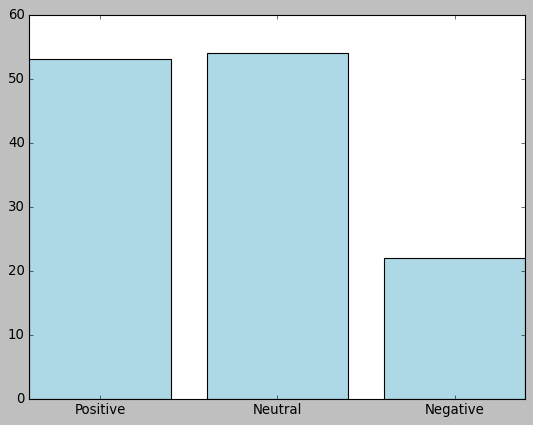

In [31]:
plt.bar(['Positive','Neutral','Negative'],freq, color='#ADD8E6')

plt.show()

## Graph 3: Bar Plot of the Frequencies of the Top 129 Adjectives and their Correlations to 'Positive,' 'Neutral,' or 'Negative'
Graph 3 expands on the last graph and offers a more accurate picture of the tone of *Pride and Prejudice*. This graph takes into account that each term occurs in the novel a unique amount of times and that this has implications for each term's weight towards the positive, neutral, or negative categories. Therefore, this graph is more useful when determining which connotation level is more dominant among the top 129 adjectives in *Pride and Prejudice*?

Graph 3 also utilizes colors more relevant to the positive, neutral, or negative nature of the adjectives, as this graph is ultimately the most useful for tonal analysis.

In [32]:
dictionary_connotations = {'positive': 0,'neutral': 0,'negative': 0}

In [33]:
for word,freq in top_129_adject:
    if dictionary[word] == 'positive':
        dictionary_connotations['positive'] = dictionary_connotations['positive'] + freq
    elif dictionary[word] == 'neutral':
        dictionary_connotations['neutral'] = dictionary_connotations['neutral'] + freq
    elif dictionary[word] == 'negative':
        dictionary_connotations['negative'] = dictionary_connotations['negative'] + freq

In [34]:
# Print to check the step worked!
dictionary_connotations

{'positive': 1563, 'neutral': 1962, 'negative': 383}

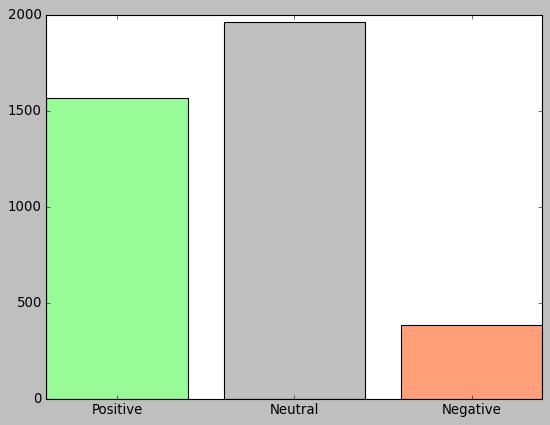

In [35]:
data = {'Positive': 1563, 'Neutral': 1962, 'Negative': 383}
names = list(data.keys())
values = list(data.values())
plt.bar(0,values[0],tick_label=names[0], color='#98FB98')
plt.bar(1,values[1],tick_label=names[1], color='#C0C0C0')
plt.bar(2,values[2],tick_label=names[2], color='#FFA07A')
plt.xticks(range(0,3),names)

plt.show()

## Analysis
To reiterate, the leading question is: **To what extent are positive, neutral, or negative adjectives mentioned in *Pride and Prejudice*, and what does this signal about tone?**

Let’s first recap what all of the graphs in this project signify.

Graph 1 simply illustrates the frequencies of the top 129 adjectives within *Pride and Prejudice*. This number, 129, was chosen because all of these adjectives appear within the text at least 10 times. This means that the adjectives further analyzed throughout this project will have had some significant influence on the text. While this graph is not particularly useful for tonal analysis, which will be discussed later, it does provide an interesting and fun visualization of the appearance frequency of the top 129 adjectives. This provides the foundational adjectives for later analysis.

Graph 2 is where tonal analysis begins. This bar plot begins to consider the top 129 adjectives and their correlations to ‘positive,’ ‘neutral,’ or ‘negative.’ Let’s first talk about these connotations. Positive, neutral, or negative adjectives are assumed to be signifiers of tone. As adjectives are parts of speech that modify other parts of speech, they function to change a word’s meaning.  

If a large portion of the adjectives in the text were associated with negative connotations, we could assume that the novel’s happy-ever-after marriage between Elizabeth and Mr. Darcy did not have precedent within the novel’s language. This lack of precedent could have various implications for Austen’s writing; it could mean that this marriage came at the end of the novel, with no warning, and was entirely unpredictable. This could potentially imply that Austen was not as skillful as most critics assume and that the tone of the novel did not properly reflect the tone of the ending. This does seem highly unlikely, considering Austen’s prestige and status as a beloved author, but it should be considered in some capacity.

However, if most of the adjectives found within the text positively changed a word's meaning, we can assume that the novel’s tone is generally positive. This tone would properly reflect Austen’s own thought that the novel is “rather too light and bright & sparkling” (Jane Austen, 212). This would make the assumption that the novel’s happy-ever-after marriage had been properly set up throughout the text, an accurate one based on data analysis. If the data shows that the adjectives, functioning as tone signifiers, properly set up the positive ending of the text, we can assume that this reflects upon the quality of Austen’s writing. Her use of language could, therefore, be inferred to be comprehensive and intentional, properly setting up the ending for readers and analysts alike. This seems like the most likely outcome, based on Austen’s prowess as a writer and status as a lauded novelist.

Moving on to interpretations of Graph 2, we see that the majority of the top 129 adjectives have neutral connotations. This means that they do not have a specified or strong, positive or negative connotation. As stated in the markdown cells above, “If a word could be used as a negative *or* positive modifying word, it got the label neutral. If the word related to sizes, ages, number orders, or was generally not placeable in the positive or negative category, it also got the label neutral.” For this graph’s interpretation, and for the future interpretation of Graph 3, we can assume that these neutral adjectives do not sway the data and, thus, the tone of the text, positively or negatively. For all intents and purposes, we can ignore them. As a further note, these adjectives were marked positive, neutral, or negative in accordance with the Merriam-Webster dictionary definition of each term. This was done manually so as to be as accurate as possible, but interpretations of a word's connotations can be highly individualized. Therefore, as much as this was avoided, a word may be misclassified. However, due to the number of terms analyzed, this effect should be negligible on any results.

When looking at adjectives with positive and negative connotations, we find that of the top 129 words, 53 of them have positive connotations, while only 22 of them have negative connotations. This begins to reveal that the novel's happy-ever-after ending has a tonal precedent. However, this particular graph does not take into account the individual frequencies of the top 129 adjectives. This could potentially sway the data set, as the 22 negative words could appear more frequently than the 53 positive words. Graph 3 explores this question.

Graph 3 is the final visualization, and it takes into account the frequencies of the top 129 adjectives and their ‘positive,’ ‘neutral,’ or ‘negative’ connotations. While the previous graphs have been illustrated in light blue, this graph utilizes green for positive, orange-red for negative, and gray for neutral. These colors, while simply more fun, serve to highlight the importance of this graph for this particular project. Graph 3 provides a far more accurate picture of the tone of *Pride and Prejudice* than the last two. It takes into account the fact that each adjective occurs within the text a unique amount of times and that this changes how each term is weighed within the positive, neutral, or negative categories.

This graph showcases that combined, the top 129 adjectives appear within the text a total of 3,908 times. Of these appearances, 1,563 of these words have positive connotations, 1,962 of these words have neutral connotations, and just 383 of these words have negative connotations. Just as in Graph 2, the neutral words can be ignored, as they are assumed to have no bearing on the tone of the text. Focusing on the words with positive connotations and negative connotations, however, yields a very clear sway in the positive direction. Adjectives with positive associations constitute 39.99% of the total adjective appearances, while adjectives with negative connotations make up just 9.8%. 

As adjectives with positive associations obviously appear far more frequently within *Pride and Prejudice* than adjectives with negative associations, one can assume that the earlier idea that we have correctly assumed that the tone of *Pride and Prejudice* would generally be a positive one, and would therefore reflect the happy-ever-after ending of the novel. This analysis will be summed up in the conclusion that follows.


*References*:

Austen, Jane. “80. To Cassandra Austen.” Letter. In *Jane Austen’s Letters*, edited by Deirdre Le Faye, 4th ed., 212–13. Oxford University Press, n.d. Accessed June 2024.

## Conclusion
Taking into account the role of an adjective as a modifier part of speech, an adjective with a positive or negative connotation will influence the language of a novel accordingly. This language modification would present itself through the tone of the novel, or the expression of the author, in this case, Jane Austen’s, attitude. 

Considering the combined frequencies of the top 129 adjectives, all of which appear in *Pride and Prejudice* at least 10 times, we find that 39.99% of the total adjective appearances have positive connotations, while adjectives with negative connotations make up just 9.8%. We can, therefore, assume that the adjectives found within the text overwhelmingly modified the language of *Pride and Prejudice* in a positive direction. This positive tone aligns with the happy-ever-after ending of *Pride and Prejudice* This alignment between the work’s tone and ending provides ample explanation for Jane Austen's position as a prolific writer and lauded novelist.

These findings, therefore, answer the research question of **“To what extent are positive, neutral, or negative adjectives mentioned in *Pride and Prejudice*, and what does this signal about tone?”** 